In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv ('predict_admission.csv')
df


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
i = df[["GRE Score","TOEFL Score","University Rating","SOP","CGPA","Research"]]  
i

,GRE Score,TOEFL Score,University Rating,SOP,CGPA,Research
0,337,118,4,4.5,9.65,1
1,324,107,4,4.0,8.87,1
2,316,104,3,3.0,8.00,1
3,322,110,3,3.5,8.67,1
4,314,103,2,2.0,8.21,0
...,...,...,...,...,...,...
495,332,108,5,4.5,9.02,1
496,337,117,5,5.0,9.87,1
497,330,120,5,4.5,9.56,1
498,312,103,4,4.0,8.43,0


In [4]:
d = df["Chance of Admit "]
d

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [5]:
i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   CGPA               500 non-null    float64
 5   Research           500 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 23.6 KB


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split (i, d, test_size = .15,random_state=0)




x_train
y_train


362    0.91
264    0.75
100    0.71
491    0.54
295    0.68
       ... 
323    0.62
192    0.86
117    0.45
47     0.89
172    0.86
Name: Chance of Admit , Length: 425, dtype: float64

In [9]:
from sklearn.linear_model import LinearRegression
lnr = LinearRegression()   
lnr.fit (x_train, y_train )

LinearRegression()

In [10]:
m=lnr.coef_  
c=lnr.intercept_   
print("slope",m)
print("intercept",c)

slope [0.00204509 0.00264033 0.00902395 0.0070277  0.12318291 0.02384033]
intercept -1.3299331934913803


In [11]:
x_test
y_test

90     0.64
254    0.85
283    0.80
445    0.91
461    0.68
       ... 
142    0.92
65     0.55
340    0.75
484    0.73
175    0.85
Name: Chance of Admit , Length: 75, dtype: float64

In [12]:
predicted_y = lnr.predict(x_test)
print("predicted y records:",predicted_y)
print("real answers",y_test)

predicted y records: [0.64588876 0.81517373 0.78442732 0.86622085 0.62491168 0.66354734
 0.5429847  0.6803583  0.53420265 0.73591673 0.62987287 0.72676343
 0.62866988 0.76180545 0.87638605 0.53846116 0.80297903 0.63058452
 0.7651735  0.53770742 0.51272806 0.70194521 0.51472535 0.91282485
 0.84408584 0.71325797 0.7276347  0.49983896 0.58449228 0.58551105
 0.69699184 0.47270933 0.6625388  0.82432128 0.56595804 0.57095954
 0.84839257 0.86203664 0.61098128 0.65080789 0.64908085 0.88657167
 0.87625067 0.71286672 0.78067914 0.79587131 0.97410918 0.84444603
 0.6198528  0.65451842 0.63324526 0.62465696 0.6028681  0.7971289
 0.70339734 0.84558539 0.54387713 0.85401403 0.6239809  0.64301229
 0.5180159  0.90943649 0.6050296  0.93536256 0.72230627 0.62972148
 0.72484231 0.85416684 0.53182816 0.75428906 0.9105478  0.78992301
 0.70477355 0.64565828 0.8017661 ]
real answers 90     0.64
254    0.85
283    0.80
445    0.91
461    0.68
       ... 
142    0.92
65     0.55
340    0.75
484    0.73
175    0

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
print("RMSE is:-")

print('Mean Absolute Error(MAE):', mean_absolute_error(y_test, predicted_y))
print('Mean Squared Error(MSE):', mean_squared_error(y_test, predicted_y))
print('Root Mean Squared Error(RMSE):', np.sqrt(mean_squared_error(y_test, predicted_y)))


RMSE is:-
Mean Absolute Error(MAE): 0.04842316956265249
Mean Squared Error(MSE): 0.004353404646315371
Root Mean Squared Error(RMSE): 0.06598033530011325


ValueError: x and y must be the same size

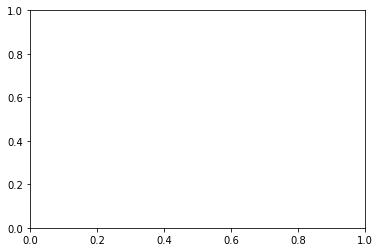

In [14]:
plt.scatter(x_test, y_test, color = 'black',label="actual answer")  
plt.plot(x_test, predicted_y, color = 'blue',label='predicted answer')
plt.legend()
plt.title ('Results ')
plt.xlabel('"SOP","CGPA"')
plt.ylabel('Chance of admission')
plt.show()
